In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import numpy as np

with open('varsity-blues.json', 'r') as f:
    data = json.loads(f.read())

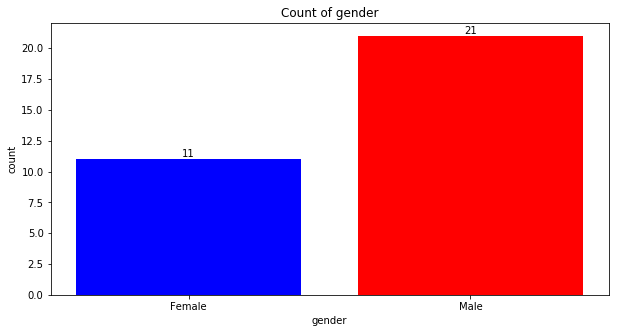

In [2]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
genders = [individual['gender'] 
           for item in data 
           for individual in item['individual']]

num_females = sum(map(lambda g: 1 if g == 'F' else 0, genders))
num_males = sum(map(lambda g: 1 if g == 'M' else 0, genders))

gender_data = [num_females, num_males]
ind = np.arange(len(gender_data))
bars = ('Female', 'Male')

fig, ax = plt.subplots(figsize=(10, 5))
rects = ax.bar(ind, gender_data, color=['blue', 'red'])
ax.set_title('Count of gender')
ax.set_ylabel('count')
ax.set_xlabel('gender')
ax.set_xticks(ind)
ax.set_xticklabels(bars)
autolabel(rects)

min age = 48, max age = 86, average age = 56.94


Text(0.5,0,'age')

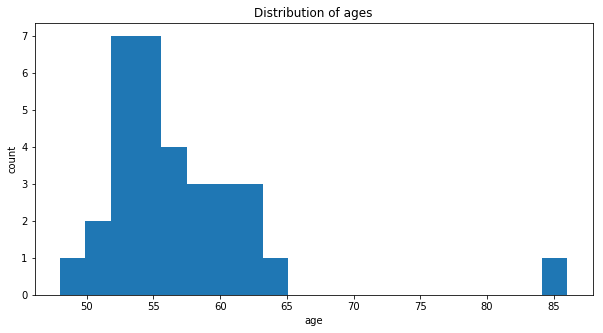

In [3]:
ages = [individual['age'] 
           for item in data 
           for individual in item['individual']]

min_age = min(ages)
max_age = max(ages)
avg_age = np.average(ages)

print('min age = {}, max age = {}, average age = {:.2f}'.format(
    min_age, max_age, avg_age))

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(ages, bins=20)
ax.set_title('Distribution of ages')
ax.set_ylabel('count')
ax.set_xlabel('age')

Text(0.5,1,'Gender and age distribution')

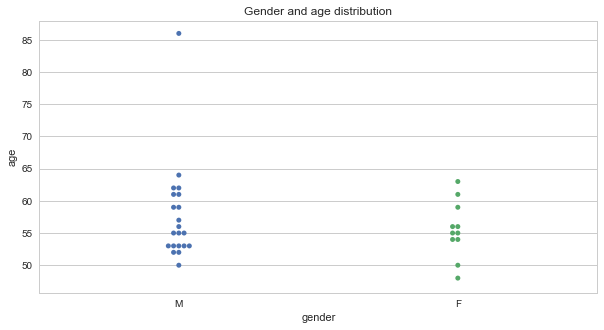

In [4]:
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

demographics = pd.DataFrame({'age': ages, 'gender': genders})

fig, ax = plt.subplots(figsize=(10, 5))
sns.swarmplot(x='gender', y='age', data=demographics, ax=ax)
ax.set_title('Gender and age distribution')

In [5]:
first_names = [individual['first_name'].lower()
           for item in data 
           for individual in item['individual']]
last_names = [individual['last_name'].lower()
           for item in data 
           for individual in item['individual']]
names = []
names.extend(first_names)
names.extend(last_names)
print(names)

[u'william', u'agustin', u'douglas', u'manuel', u'elizabeth', u'robert', u'jane', u'gordon', u'gregory', u'marcia', u'robert', u'stephen', u'davina', u'bruce', u'felicity', u'mossimo', u'lori', u'gamal', u'diane', u'todd', u'amy', u'gregory', u'elisabeth', u'michelle', u'toby', u'marci', u'peter', u'\u201cjoey\u201d', u'marjorie', u'devin', u'john', u'homayoun', u'mcglashan', u'huneeus', u'hodge', u'henriquez', u'henriquez', u'flaxman', u'buckingham', u'caplan', u'abbott', u'abbott', u'zangrillo', u'semprevivo', u'isackson', u'isackson', u'huffman', u'giannulli', u'loughlin', u'abdelaziz', u'blake', u'blake', u'colburn', u'colburn', u'kimmel', u'janavs', u'macfarlane', u'palatella', u'jan sartorio', u'chen', u'klapper', u'sloane', u'wilson', u'zadeh']


In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.corpora.dictionary import Dictionary
from gensim import models

def get_profile(documents):
    frequency = {}
    for text in documents:
        tokens = [t.lower() for t in word_tokenize(text)]
        for word in tokens:
            if word not in frequency:
                frequency[word] = 0
            frequency[word] = frequency[word] + 1
    return frequency

def clean(text, profile, stop_words, stemmer):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if profile[word] > 1]
    tokens = [word for word in tokens if not word in stop_words]
    if stemmer is not None:
        tokens = [stemmer.stem(word) for word in tokens]
    tokens = [word for word in tokens if not word in stop_words]
    return tokens


stop_words = stopwords.words('english')
stop_words.extend(['else', 'onto', 'said', 'someone', 'live', 'designate', 'work', 'say', 'port'])
stop_words.extend(names)

stemmer = PorterStemmer()

documents = [item['description'] for item in data]
profile = get_profile(documents)
texts = [clean(d, profile, stop_words, stemmer) for d in documents]
unstemmed_texts = [clean(d, profile, stop_words, None) for d in documents]

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

num_topics = 10
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
corpus_lsi = lsi[corpus_tfidf]

In [7]:
lsi.print_topics(num_topics)

[(0,
  u'-0.145*"water" + -0.141*"son" + -0.132*"angel" + -0.128*"lo" + -0.127*"accord" + -0.126*"former" + -0.125*"exchang" + -0.122*"admiss" + -0.122*"get" + -0.121*"execut"'),
 (1,
  u'0.463*"busi" + 0.260*"publicli" + 0.260*"avail" + 0.199*"behalf" + 0.191*"menlo" + 0.187*"park" + 0.186*"record" + 0.167*"entranc" + 0.160*"exam" + 0.159*"food"'),
 (2,
  u'-0.414*"water" + -0.237*"angel" + -0.218*"lo" + -0.200*"polo" + 0.190*"basketbal" + -0.187*"admit" + 0.178*"former" + 0.167*"busi" + 0.158*"heinel" + 0.153*"senior"'),
 (3,
  u'-0.277*"angel" + -0.246*"lo" + -0.224*"maci" + -0.204*"actress" + -0.198*"tenni" + -0.186*"marri" + -0.181*"unclear" + -0.172*"coupl" + -0.171*"fraudul" + 0.165*"develop"'),
 (4,
  u'-0.278*"tpg" + -0.239*"bill" + -0.179*"senior" + 0.173*"univers" + 0.169*"help" + -0.167*"basketbal" + 0.166*"man" + 0.144*"applic" + -0.142*"way" + -0.142*"ask"'),
 (5,
  u'0.298*"exchang" + -0.243*"tenni" + -0.177*"georgetown" + -0.169*"coach" + -0.169*"ernst" + 0.167*"ye" + 0

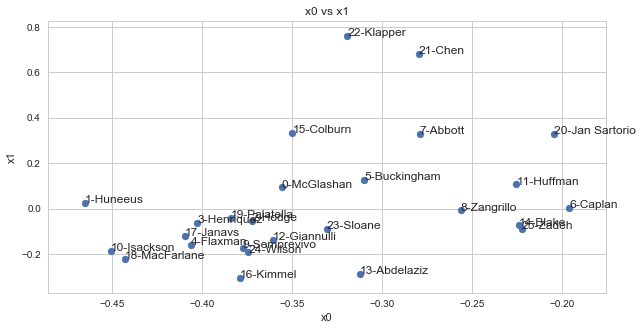

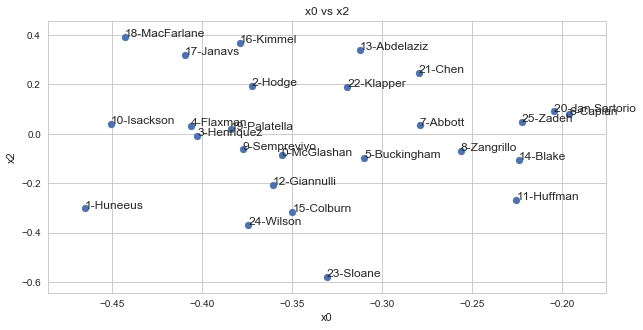

In [8]:
def scatter_plot_lsi(df, x1, x2):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(df[x1], df[x2])
    ax.set_title('{} vs {}'.format(x1, x2))
    ax.set_xlabel(x1)
    ax.set_ylabel(x2)
    
    for i, name in enumerate(df['name']):
        x = df.iloc[i][x1]
        y = df.iloc[i][x2]
        ax.annotate(name, (x, y))
        
lsi_data = pd.DataFrame({
    'x0': [doc[0][1] for doc in corpus_lsi],
    'x1': [doc[1][1] for doc in corpus_lsi],
    'x2': [doc[2][1] for doc in corpus_lsi],
    'x3': [doc[3][1] for doc in corpus_lsi],
    'x4': [doc[4][1] for doc in corpus_lsi],
    'x5': [doc[5][1] for doc in corpus_lsi],
    'x6': [doc[6][1] for doc in corpus_lsi],
    'x7': [doc[7][1] for doc in corpus_lsi],
    'x8': [doc[8][1] for doc in corpus_lsi],
    'x9': [doc[9][1] for doc in corpus_lsi],
    'name': [str(i) + '-' + item['individual'][0]['last_name'] for i, item in enumerate(data)],
    'description': [item['description'] for item in data]
})

scatter_plot_lsi(lsi_data, 'x0', 'x1')
scatter_plot_lsi(lsi_data, 'x0', 'x2')

Text(0.5,1,'Parallel coordinate plot of individuals in concept space')

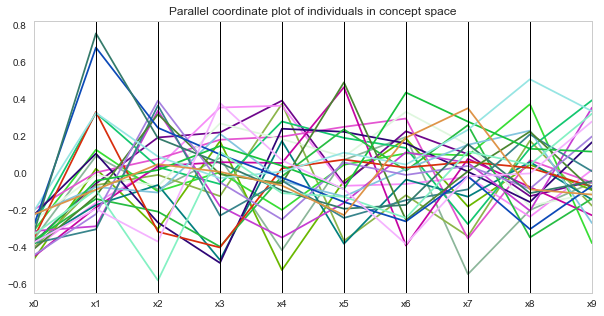

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
cols = [c for c in lsi_data.columns if c.startswith('x') or c == 'name']
pd.plotting.parallel_coordinates(lsi_data[cols], 'name', ax=ax)
ax.get_legend().remove()
ax.set_title('Parallel coordinate plot of individuals in concept space')

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def get_sil_avg(df, n_clusters):
    cols = [c for c in df.columns if c.startswith('x')]
    X = df[cols].values

    kmeans = KMeans(n_clusters=n_clusters, random_state=37).fit(X)
    labels = kmeans.fit_predict(X)

    sil_avg = silhouette_score(X, labels)
    return sil_avg

for n_clusters in range(2, 21, 1):
    sil_avg = get_sil_avg(lsi_data, n_clusters)
    print('{}: {:.5f}'.format(n_clusters, sil_avg))

2: 0.10512
3: 0.11316
4: 0.17253
5: 0.17186
6: 0.21345
7: 0.25855
8: 0.28082
9: 0.32402
10: 0.33300
11: 0.32183
12: 0.32012
13: 0.29507
14: 0.29018
15: 0.27810
16: 0.24938
17: 0.22498
18: 0.20779
19: 0.19877
20: 0.17919


In [11]:
cols = [c for c in lsi_data.columns if c.startswith('x')]
X = lsi_data[cols].values

kmeans = KMeans(n_clusters=10, random_state=37).fit(X)
labels = kmeans.fit_predict(X)
tups = [(label, i, lsi_data.iloc[i]['name']) for i, label in enumerate(labels)]
tups = sorted(tups, key=lambda tup: tup[0])

for tup in tups:
    print('{} : {} : {}'.format(tup[0], tup[1], tup[2]))

0 : 13 : 13-Abdelaziz
0 : 16 : 16-Kimmel
0 : 18 : 18-MacFarlane
1 : 2 : 2-Hodge
1 : 4 : 4-Flaxman
1 : 6 : 6-Caplan
1 : 8 : 8-Zangrillo
1 : 19 : 19-Palatella
2 : 11 : 11-Huffman
2 : 12 : 12-Giannulli
2 : 15 : 15-Colburn
3 : 21 : 21-Chen
3 : 22 : 22-Klapper
4 : 0 : 0-McGlashan
4 : 1 : 1-Huneeus
5 : 23 : 23-Sloane
5 : 24 : 24-Wilson
6 : 3 : 3-Henriquez
6 : 9 : 9-Semprevivo
7 : 10 : 10-Isackson
7 : 17 : 17-Janavs
8 : 5 : 5-Buckingham
8 : 14 : 14-Blake
8 : 25 : 25-Zadeh
9 : 7 : 7-Abbott
9 : 20 : 20-Jan Sartorio


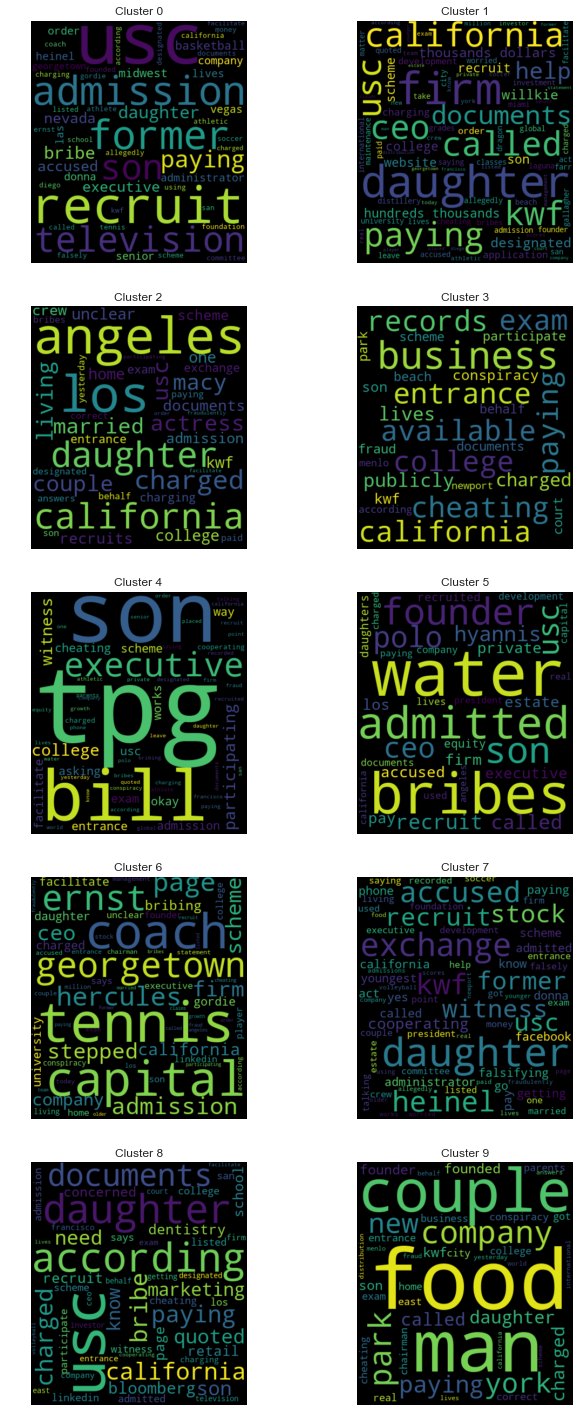

In [12]:
from wordcloud import WordCloud

def get_texts(cluster, texts, tups):
    cluster_tups = filter(lambda tup: tup[0] == cluster, tups)
    cluster_texts = map(lambda tup: texts[tup[1]], cluster_tups)
    cluster_texts = map(lambda arr: ' '.join(arr), cluster_texts)
    return ' '.join(cluster_texts)

fig, ax = plt.subplots(5, 2, figsize=(10, 20))
ax = np.ravel(ax)

for cluster in range(10):
    cluster_text = get_texts(cluster, unstemmed_texts, tups)
    wordcloud = WordCloud(width=400, height=450).generate(cluster_text)
    ax[cluster].imshow(wordcloud, interpolation='bilinear')
    ax[cluster].axis('off')
    ax[cluster].set_title('Cluster {}'.format(cluster))
plt.tight_layout()

In [13]:
import gensim 
from gensim.models import Word2Vec 

emb_model = gensim.models.Word2Vec(texts, min_count = 1, size = 100, window = 10)

In [15]:
for word in ['bribe', 'usc', 'georgetown', 'tpg', 'kwf', 'coach', 'son', 'daughter', 'cheat', 'pay']:
    result = emb_model.wv.most_similar(positive=[word], topn=1)[0]
    print('{} : {} : {}'.format(word, result[0], result[1]))

bribe : fals : 0.27547237277
usc : help : 0.286042332649
georgetown : coach : 0.272839277983
tpg : kwf : 0.348134219646
kwf : tpg : 0.348134219646
coach : founder : 0.37107437849
son : athlet : 0.317418545485
daughter : design : 0.287608832121
cheat : team : 0.231848150492
pay : charg : 0.303405225277


# References

* [Get To Know The Rich Assholes Charged With Paying Millions In Bribes To Get Their Kids Into College ](https://deadspin.com/get-to-know-the-rich-assholes-charged-with-paying-milli-1833244052)